## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [55]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [56]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [57]:
n_rows = df.shape[0]
print ("Number of rows in the dataset: {}".format(n_rows))

Number of rows in the dataset: 294478


c. The number of unique users in the dataset.

In [58]:
n_unique_users = df['user_id'].nunique()
print ("Number of unique users in the dataset: {}".format(n_unique_users))

Number of unique users in the dataset: 290584


d. The proportion of users converted.

In [59]:
n_conversion = df[df['converted'] == 1] # number of conversions
unique_users_converted = n_conversion['user_id'].nunique() # number of unique users converted
proportion_converted = ((unique_users_converted/n_unique_users)*100)
print ("The proportion of users converted is: {:.2f}%".format(proportion_converted))

The proportion of users converted is: 12.10%


e. The number of times the `new_page` and `treatment` don't line up.

In [60]:
n_duo = pd.Categorical((df.landing_page.astype(str)+df.group.astype(str))).value_counts() # number of each duo (newpage_control, new_pagetratment, etc)
dontlineup = n_duo['new_pagecontrol']+n_duo['old_pagetreatment']
print ("The number of times the new_page and treatment do not line up is: {}".format(dontlineup))

The number of times the new_page and treatment do not line up is: 3893


f. Do any of the rows have missing values?

In [61]:
if df.isnull().values.any() == False:
    print('No rows have missing values')
else : print(df.info())

No rows have missing values


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [62]:
df_a = df.loc[(df['landing_page'] == 'new_page') & (df['group'] == 'treatment')]
              
df_b = df.loc[(df['landing_page'] == 'old_page') & (df['group'] == 'control')]

frames = [df_a, df_b]

df2 = pd.concat(frames)

In [63]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [64]:
n_unique_users = df2['user_id'].nunique()
print ("Number of unique users in the dataset: {}".format(n_unique_users))

Number of unique users in the dataset: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [65]:
df2['duplicate'] = df2['user_id'].duplicated()
user_id_duplicate = df2['user_id'].loc[df2['duplicate'] == True]
print("The one user_id repeated in df2 is : {} ".format(user_id_duplicate.iloc[0]))

The one user_id repeated in df2 is : 773192 


c. What is the row information for the repeat **user_id**? 

In [66]:
row = df2.loc[df2['user_id']==773192].index
print("The row information for the repeat user_id is : {} ".format(row[1]))

The row information for the repeat user_id is : 2893 


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [67]:
df2 = df2.drop(df2.index[2893])

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [68]:
df2_conversion = df2[df2['converted'] == 1]
probability = (len(df2_conversion)/n_unique_users)
print ("The probability of an individual converting regardless of the page is: {:.4f}".format(probability))

The probability of an individual converting regardless of the page is: 0.1196


b. Given that an individual was in the `control` group, what is the probability they converted?

In [69]:
df_unique_users_control = df2[df2['group'] == 'control']
n_unique_users_control = len(df_unique_users_control)
n_conversion_control = len(df_unique_users_control[df_unique_users_control['converted'] == 1])
probability_control = n_conversion_control/n_unique_users_control
print ("The probability of an individual converting from the control group: {:.4f}".format(probability_control))

The probability of an individual converting from the control group: 0.1204


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [70]:
df_unique_users_treatment = df2[df2['group'] == 'treatment']
n_unique_users_treatment = len(df_unique_users_treatment)
n_conversion_treatment = len(df_unique_users_treatment[df_unique_users_treatment['converted'] == 1])
probability_treatment = n_conversion_treatment/n_unique_users_treatment
print ("The probability of an individual converting from the treatment group: {:.4f}".format(probability_treatment))

The probability of an individual converting from the treatment group: 0.1188


d. What is the probability that an individual received the new page?

In [71]:
n_new_page = len(df2[df2['landing_page']=='new_page'])
probabiility_newpage = n_new_page / n_unique_users
print ("The probability that an individual received the new page is: {:.4f}".format(probabiility_newpage))

The probability that an individual received the new page is: 0.5001


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions? Write your response below.

Answer

|    Page     | Impression | Conversion |
| :------------: | :---------------: | :-------------: | 
| Old_Page| 0,4999           | 0,1204          |
| New_Page     | 0,5001            | 0,1188         |

If we consider the previous answers, we could say that **the old page leads to more conversions.**

Indeed, both pages have a similar number of impressions and the old page has a slightly better probability of conversion.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

**Null hypothesis**

$H_0: p_{new} - p_{old} \leq 0$

**Alternative hypothesis**

$H_1:  p_{new} - p_{old} > 0$

**Type one error = 5%**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [72]:
convert_p_new = convert_p_old = probability
print ("The convert rate for  p_new  under the null is: {:.4f}".format(convert_p_new))

The convert rate for  p_new  under the null is: 0.1196


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [73]:
print ("The convert rate for  p_old  under the null is: {:.4f}".format(convert_p_old))

The convert rate for  p_old  under the null is: 0.1196


c. What is $n_{new}$?

In [74]:
n_new = len(df2[df2['landing_page'] == 'new_page'])
print ("n_new is: {}".format(n_new))

n_new is: 145310


d. What is $n_{old}$?

In [75]:
n_old = len(df2[df2['landing_page'] == 'old_page'])
print ("n_old is: {}".format(n_old))

n_old is: 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [76]:
new_page_converted  = np.random.choice([1, 0], size=n_new, p=[convert_p_new, (1-convert_p_new)])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [77]:
old_page_converted  = np.random.choice([1, 0], size=n_old, p=[convert_p_old, (1-convert_p_old)])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [78]:
p_diff = new_page_converted.mean()-old_page_converted.mean()
print('p_new - p_old for our simulated values is:',p_diff)

p_new - p_old for our simulated values is: 0.00260644086547


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [79]:
p_diffs = []
for i in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[convert_p_new, (1-convert_p_new)])
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[convert_p_old, (1-convert_p_old)])
    p_diff = new_page_converted.mean()-old_page_converted.mean()
    p_diffs.append(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

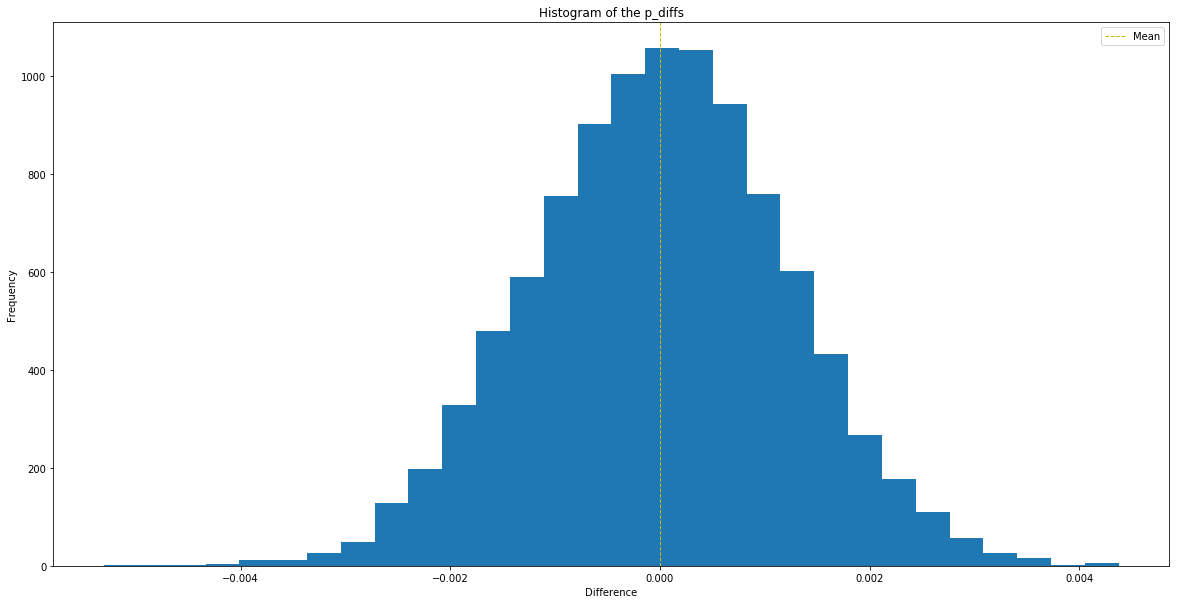

In [80]:
plt.figure(figsize = (20,10))
plt.hist(p_diffs, bins=30)
plt.title('Histogram of the p_diffs')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.axvline((np.array(p_diffs).mean()), color='y', linestyle='dashed', linewidth=1, label="Mean")
plt.legend()
plt.show()

The null hypothesis states that the population is normally distributed.

So, we can't be surprised to obtain a plot with a normal distribution.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [81]:
actual_difference = probability_treatment-probability_control
greater_p_diffs = [i for i in p_diffs if i > actual_difference]
propor_greater_p_diffs = (len(greater_p_diffs) / len(p_diffs))*100
print('The proportion of the p_diffs greater than the actual difference observed in ab_data.csv is: {}%'.format(propor_greater_p_diffs))

The proportion of the p_diffs greater than the actual difference observed in ab_data.csv is: 89.84%


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

* What is this value called in scientific studies?
In scientific studies this value is called: **probability value or p-value.**

In statistical hypothesis testing, the p_value is defined as the probability, under the null-hypothesis, to get a result equal to or more extreme than what was actually observed.

Source:

https://en.wikipedia.org/wiki/P-value

* What does this value mean in terms of whether or not there is a difference between the new and old pages?

We have a p-value superior to 90% for a threshold of 5%, we could say that **we face a really large p-value.**

This indicates a weak evidence against the null hypothesis, so **it seems we will fail to reject the null hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [82]:
import statsmodels.api as sm

convert_old = len(df2[(df2['landing_page']=='old_page')&(df2['converted']==1)])
convert_new = len(df2[(df2['landing_page']=='new_page')&(df2['converted']==1)]) 

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [83]:
z_score, p_value = sm.stats.proportions_ztest(count=[convert_new, convert_old], 
                                              nobs=[n_new, n_old],alternative='larger')
print("z-score:", z_score,"\np-value:", p_value)

z-score: -1.31092419842 
p-value: 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

* What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?

**We get an equivalent p-value than in question k**, so we do not reject the null-hypothesis.

To interpret the z-score we need to define its critical value.

In [84]:
from scipy.stats import norm

critical_value = norm.ppf(1-(0.05))

print('The critical value of our z-score is : {:.4f}'.format(critical_value))

The critical value of our z-score is : 1.6449


**We can observe that our z-score is less than the critical value, hence we are confirmed that we do not reject the null-hypothesis.**

* Do they agree with the findings in parts j. and k.?

Yes, they agree with our precedent findings.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

We face a classification problem and we should use a logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [85]:
df2['intercept'] = 1

In [86]:
df2[['control','treatment']] = pd.get_dummies(df2['group'])
df2['ab_page']=df2['treatment']

In [87]:
df2.head()

,user_id,timestamp,group,landing_page,converted,duplicate,intercept,control,treatment,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False,1,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False,1,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,False,1,0,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,False,1,0,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,False,1,0,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [88]:
logit = sm.Logit(df2['converted'], df2[['ab_page', 'intercept']])
result=logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [89]:
result.summary(title='Model Summary')

<class 'statsmodels.iolib.summary.Summary'>
"""
                                Model Summary                                 
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 21 Dec 2017   Pseudo R-squ.:               8.077e-06
Time:                        12:03:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

* What is the p-value associated with ab_page?

**The p-value associated with ab_page is 0.19.**

* Why does it differ from the value you found in the Part II?

It differs from the value we find in Part II because with the logistic regression **we applied a two sides hypothesis testing.**

Conversely, in part II we applied a one side hypothesis.

**Note that both methods do not reject the null hypothesis.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

We cannot reject the null hypothesis.

In this context, in order to find a way to optimize conversion, **we should consider other factors to add into our regression model.**

In a classic way, we can consider the following factors:

* traffic source (natural, ads, email,…)
* localization (country, city, rural zone,…)
* time (month, week, day of the week,…)
* device (laptop, phone, tablet,…)
* age range (18-25, 25-35, 45-55,…)

However, we have to keep in mind that too many features can conduct to a lack of statistical significance.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the countries.csv dataset and merge together your datasets on the approporiate rows. Here are the docs for joining tables.

Does it appear that country had an impact on conversion? Don't forget to create dummy variables for these country columns - Hint: You will need two columns for the three dummy variables. Provide the statistical output as well as a written response to answer this question.

In [90]:
countries_df = pd.read_csv('countries.csv')

In [91]:
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [92]:
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,duplicate,intercept,control,treatment,ab_page,CA,UK,US
user_id,,,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,False,1,0,1,1,0,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,False,1,0,1,1,0,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,False,1,1,0,0,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,False,1,0,1,1,0,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,False,1,0,1,1,0,0,1


In [93]:
# calcul n for each countries
n_CA = len(df_new[df_new['CA']==1])  
n_UK = len(df_new[df_new['UK']==1])  
n_US = len(df_new[df_new['US']==1])  
N = n_CA+n_UK+n_US

# calcul number of convert users by countries
c_CA = len(df_new.loc[(df_new['converted']==1)&(df_new['CA']==1)])
c_UK = len(df_new.loc[(df_new['converted']==1)&(df_new['UK']==1)])
c_US = len(df_new.loc[(df_new['converted']==1)&(df_new['US']==1)])
C=c_CA+c_UK+c_US

# probability to convert by countries
P = C/N*100
p_CA = c_CA/n_CA*100
p_UK = c_UK/n_UK*100
p_US = c_US/n_US*100

print('The probability to convert a user is:{:.2f}%'.format(P))
print('The probability to convert a CA user is:{:.2f}%'.format(p_CA))
print('The probability to convert a UK user is:{:.2f}%'.format(p_UK))
print('The probability to convert a US user is:{:.2f}%'.format(p_US))

The probability to convert a user is:11.96%
The probability to convert a CA user is:11.53%
The probability to convert a UK user is:12.06%
The probability to convert a US user is:11.95%


In [94]:
# percentage of each country 
print('Percentage of CA on the dataset :', n_CA/N*100)
print('Percentage of UK on the dataset :', n_UK/N*100)
print('Percentage of US on the dataset :', n_US/N*100)

Percentage of CA on the dataset : 4.989607135974452
Percentage of UK on the dataset : 24.938055777331165
Percentage of US on the dataset : 70.07233708669438


By making a simple probability calculation we can see that the countries **do not seem to have a significant impact on the conversion.**

In addition, **we can observe that the US accounts for more than 70%**, making comparisons of probability rates insignificant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [95]:
# we do not use 'CA' because its proportion is too weak. 
logit = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','UK','US']])
result=logit.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [96]:
result.summary(title='Summary of countries and pages')

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Summary of countries and pages                        
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 21 Dec 2017   Pseudo R-squ.:               2.323e-05
Time:                        12:03:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

Countries seem to have some impact on the conversion rate, but not enough to be statistically significant.

<a id='conclusions'></a>
## Conclusions

Each way to evaluate the difference between the new page and the old page drive to the same result: **we fail to reject the null hypothesis.**

Hence, we do not find out a way to improve the conversion.

In order to enrich our analysis and discern paths to increase the conversion, we could do the following actions:

* Check if the two pages are significantly different. We can use a model, as the lyft model from widerfunnel, to support the difference on value proposition, relevance, clarity, urgency, distraction or anxiety.

More on the lyft model: https://www.widerfunnel.com/lift-model/

* Give more times to the test in order to have more data.

* Add other factors into our regression model, as traffic sources, localization, time, device, or age range.

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.